# Part 1: Exploring the friendship paradox

## Setup from part 2 of week 3

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a graph consisting of a single link (edge) between two nodes
G = nx.Graph()
G.add_edge(0, 1)  # Adding an edge between node 0 and node 1


In [24]:
total_nodes = 5000

# Start with the graph created previously
for new_node in range(2, total_nodes):
    # Generate a list of all nodes based on their degree (flattened list)
    existing_nodes = list(G.nodes())
    flattened_list = []
    for node in existing_nodes:
        flattened_list.extend([node] * G.degree(node))  # Add each node in proportion to its degree

    # Select an existing node to connect to, weighted by the flattened list
    target_node = random.choice(flattened_list)

    # Add the new node and connect it to the selected target node
    G.add_edge(new_node, target_node)


In [25]:
# Calculate the degrees of all nodes in the 5000-node network
degrees = dict(G.degree())

# Find the maximum and minimum degree
max_degree = max(degrees.values())
min_degree = min(degrees.values())
print(max_degree)
print(min_degree)

143
1


## The friendship paradox in BA networks

### Pick a node i at random (e.g. use random.choice). Find its degree

In [26]:
# Pick a node i at random
random_node = random.choice(list(G.nodes()))

# Find its degree
node_degree = G.degree(random_node)

print(f"Randomly selected node: {random_node}")
print(f"Degree of node {random_node}: {node_degree}")

Randomly selected node: 2522
Degree of node 2522: 1


- random.choice(list(G.nodes())): the nodes in the network are converted into a list to allow random selection.
- G.degree(random_node): returns the degree of the selected node

### Find i's neighbors. And calculate their average degree.

In [27]:
# neighbors of the randomly selected node
neighbors = list(G.neighbors(random_node))

# Calculate  average degree
if neighbors:  # avoid division by zero if node has no neighbors
    neighbor_degrees = [G.degree(neighbor) for neighbor in neighbors]
    average_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
else:
    average_neighbor_degree = 0 # No neighbors

- Use G.neighbors(node) to get the neighbors of node i
- find each neighbors degree using G.degree(neighbor)
- find average degree of neighbors

### Compare the two numbers to check if it's true that i's friends (on average) have more friends than i

In [28]:
if average_neighbor_degree > node_degree:
    print("i's friend has more friends than i do")
else:
    print("i have more friends than i's friends")

i's friend has more friends than i do


- Compare the degree of node i with the average degree of its neighbors
- Check if the friendship paradox holds by seeing if the average degree of the neighbors is greater than the degree of node i.

### Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [29]:
num_trials = 1000

# Counter for friendship paradox holds
paradox_count = 0

for _ in range(num_trials):
    # Pick a node i at random
    random_node = random.choice(list(G.nodes()))

    # Find its degree
    node_degree = G.degree(random_node)

    # neighbors of the randomly selected node
    neighbors = list(G.neighbors(random_node))

    # Calculate  average degree
    if neighbors:  # avoid division by zero if node has no neighbors
        neighbor_degrees = [G.degree(neighbor) for neighbor in neighbors]
        average_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
    else:
        average_neighbor_degree = 0 # No neighbors

    if average_neighbor_degree > node_degree:
        paradox_count += 1


print(f"friendship paradox {paradox_count}/{num_trials} times")

friendship paradox 856/1000 times


- **for _ in range(num_trials):** repeats picking a random node and calculating the degrees until 1000 times.
- **paradox_count** tracks how many times the friendship paradox holds
- Otherwise the rest of the code is reused from previous exercises above

## The friendship paradox more generally

### What if the power law is flatter, e.g. $p(k)∼k^-γ$ with $γ=2$? Will the fraction of times the paradox is true be higher or lower?

In a network that has a flatter degree distribution, in this case $(𝛾=2)$, there are more high-degree nodes we call hubs, which means that a typical node is more likely to be connected to these hubs, which raises the average degree of its neighbors.
Because the high-degree hubs raise the average degree of neighbors, the fraction of times the paradox is true will likely be higher.

### Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the configuation model. The networkx funtion is here nx.configuration_model. I suggest you make the network pretty big ... let's say 5000 nodes or more.

- Generate a degree sequence following the power-law distribution using the transformation method.
- Convert the degree sequence to integers (since degrees need to be whole numbers).
- Adjust the degree sequence if necessary to ensure that the sum of degrees is even (a requirement for the configuration model).
- Create the configuration model using nx.configuration_model().

In [30]:
# parameters for power law distribution
n = 5000  
gamma = 2  
x_min = 1  

# create the degree sequence using transformation method
def create_degree_sequence(n, gamma, x_min):
    degree_sequence = []
    for _ in range(n):
        r = random.random()  # random number between 0 and 1
        degree = x_min * ((1 - r) ** (-1 / (gamma - 1)))  # Transformation method
        degree_sequence.append(round(degree))  # Round to int
    return degree_sequence

# degree sequence
degree_sequence = create_degree_sequence(n, gamma, x_min)

# check if sum of degree sequence is even
if sum(degree_sequence) % 2 != 0:
    degree_sequence[0] += 1

# configuration model using generated degree sequence
config_model_network = nx.configuration_model(degree_sequence)

# Convert the graph to an undirected graph - remove parallel edges and self loops
config_model_network = nx.Graph(config_model_network)  # Convert to graph
config_model_network.remove_edges_from(nx.selfloop_edges(config_model_network))  # Remove self loops

print(f"Generated network has {config_model_network.number_of_nodes()} nodes and {config_model_network.number_of_edges()} edges.")

Generated network has 5000 nodes and 15074 edges.


- The function generate_degree_sequence() generates a degree sequence using the transformation method, where the degree x is drawn from a power-law distribution $p(k)∼k^-γ$ with $γ=2$. r is a random number between 0 and 1, which is transformed into a power-law distributed degree value. The degrees are then rounded to integers as this is needed for the configuration model.
- If the sum of the degree sequence is odd we need to change the first degree by adding 1 to make sure that the sum is even because this is needed in order for the configuration model to work.
- nx.configuration_model(degree_sequence) is used to generate a random graph with the exact degree sequence.
- Sometimes the configuration model generates parallel edges or self loops. This is why the graph is converted into an undirected graph when removing these.

### Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

To find the answer we can simply use the same code as in the previous test with the Barabási-Albert network:

In [31]:
num_trials = 1000

# Counter for friendship paradox holds
paradox_count_new = 0

for _ in range(num_trials):
    # Pick a node i at random
    random_node = random.choice(list(config_model_network.nodes()))

    # Find its degree
    node_degree = config_model_network.degree(random_node)

    # neighbors of the randomly selected node
    neighbors = list(config_model_network.neighbors(random_node))

    # Calculate  average degree
    if neighbors:  # avoid division by zero if node has no neighbors
        neighbor_degrees = [config_model_network.degree(neighbor) for neighbor in neighbors]
        average_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
    else:
        average_neighbor_degree = 0 # No neighbors

    if average_neighbor_degree > node_degree:
        paradox_count_new += 1


print(f"friendship paradox {paradox_count_new}/{num_trials} times")


friendship paradox 969/1000 times


We can see that the configuration network holds the friendship paradox more than the BA network. We can see from these results that the flatter power-law distribution (with $𝛾=2$) leads to a relatively higher proportion of the friendship paradox than the BA network. This is because the flatter distribution results in more hubs which helps making it more likely that a node’s neighbors have more connections than the node itself.
When can thereby deduct that the more hubs in a network the more the friendship paradox is likely to hold because these hubs pull the average neighbor degree higher for most nodes.

## The friendship paradox and the configuration model

### Now generate a network for the configuration model that has the same slope and number of nodes as F-BA* in A above; let's call this new network F-CM* (for friendship configuration model).

Here we can simply extract the network from the F-BA exercises and use the configuration method used in the previous exercises

In [33]:
# Extract the degree sequence from F-BA
degree_sequence_f_ba = [G.degree(node) for node in G.nodes()]

# check even sum
if sum(degree_sequence_f_ba) % 2 != 0:
    degree_sequence_f_ba[0] += 1 

# Create F-CM* using F-BA
f_cm_network = nx.configuration_model(degree_sequence_f_ba)

# create graph without parallel edges and self loops
f_cm_network = nx.Graph(f_cm_network)
f_cm_network.remove_edges_from(nx.selfloop_edges(f_cm_network)) 


### What fraction of the time is the friendship paradox is true for the F-CM network?

We can simply re-use the code from earlier again

In [35]:
num_trials = 1000

# Counter for friendship paradox holds
paradox_count_f_cm = 0

for _ in range(num_trials):
    # Pick a node i at random
    random_node = random.choice(list(f_cm_network.nodes()))
    
    # Find its degree
    node_degree = f_cm_network.degree(random_node)
    
    # neighbors of the randomly selected node
    neighbors = list(f_cm_network.neighbors(random_node))
    
    # Calculate  average degree
    if neighbors:  # avoid division by zero if node has no neighbors
        neighbor_degrees = [f_cm_network.degree(neighbor) for neighbor in neighbors]
        average_neighbor_degree = sum(neighbor_degrees) / len(neighbors)
    else:
        average_neighbor_degree = 0  # No neighbors
    
    if average_neighbor_degree > node_degree:
        paradox_count_f_cm += 1

print(f"friendship paradox {paradox_count_f_cm}/{num_trials} times")  
# Find the fraction as asked in the question
paradox_fraction_f_cm = paradox_count_f_cm / num_trials
print(f"fraction {paradox_fraction_f_cm}")  

friendship paradox 657/1000 times
fraction 0.657


### Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox.

Subquestion 1: Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).

Subquestion 2: How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

The friendship paradox is influenced by more than just the degree distribution of a network. Assortativity refers to the tendency of nodes to connect to other nodes with similar degrees. In a network with high assortativity, nodes with a high degree (many connections) tend to connect to other high-degree nodes, which could reduce the frequency of the friendship paradox being true since both the node and its neighbors have similarly high degrees. 

Clustering measures the chance of the neighbors of some node to also be connected, which might reduce the paradox frequency being true of the friendship paradox since tightly clustered groups of nodes could have similar degrees. 

In community-structured networks, where nodes are divided into tightly-knit subgroups, the paradox may appear less frequently within highly homogeneous communities compared to more diverse ones. The F-BA network have lower assortativity and more hierarchical structure, while the F-CM network are more randomized, potentially leading to fewer structural patterns like clustering or community structure, which might explain the lower paradox frequency in F-CM.

To test more rigorously if the friendship paradox holds equally often in F-BA and F-CM, a statistical hypothesis test like a two-sample proportion test could be used to compare the observed frequencies of the paradox in both networks. Given that in 1000 trials, F-BA shows the paradox 856 times and F-CM shows it 657 times, we can test whether this difference is statistically significant by calculating confidence intervals. And then off course a larger number of trials would reduce random fluctuations and give a clearer picture of whether these differences are truly due to network structure or random variation.

## Growth without preferential attachment

### Grow a new network (the Sune-network) with the same parameters as the F-BA network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: have the incoming nodes connect to the existing nodes with equal probability. This is the Sune-network.

We can simply use the code from earlier with some slight changes.

In [41]:
G_sune = nx.Graph()
G_sune.add_edge(0, 1)
total_nodes = 5000

for new_node in range(2, total_nodes):
    # list of all existing nodes
    existing_nodes = list(G_sune.nodes())

    # Choose existing node to connect to with equal probability
    target_node = random.choice(existing_nodes)

    # Add new node and connect to the selected target node
    G_sune.add_edge(new_node, target_node)

print(f"{G_sune.number_of_nodes()} nodes - {G_sune.number_of_edges()} edges")

5000 nodes - 4999 edges


### Generate an ER network of same number of nodes and links as the Sune-network.

In [42]:
# Same parameters as before
num_nodes = G_sune.number_of_nodes()
num_edges = G_sune.number_of_edges()

# Generate an ER network with 5000 nodes and 4999 edges
G_er = nx.gnm_random_graph(num_nodes, num_edges)

print(f"{G_er.number_of_nodes()} nodes - {G_er.number_of_edges()} edges")

5000 nodes - 4999 edges


### What are the differences between the ER network and the Sune-network?

We can start off by plotting the degree distributions against each other

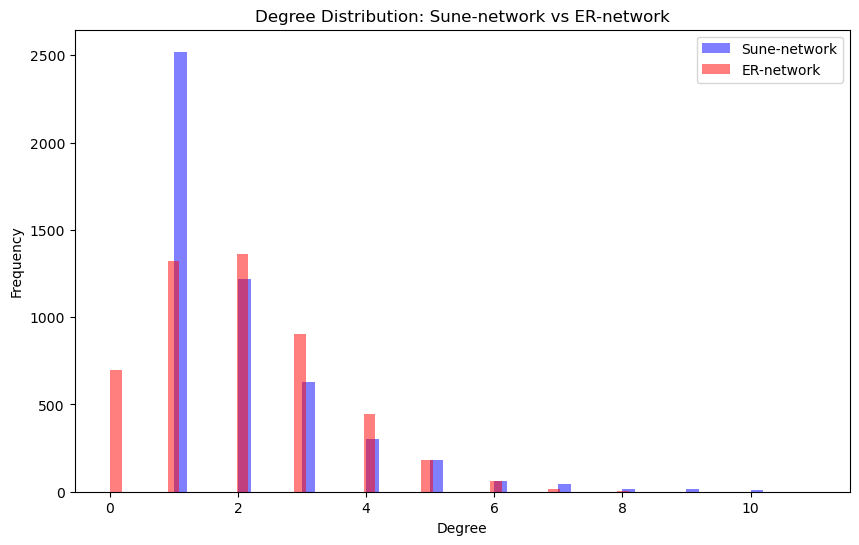

In [43]:
# Degree sequences
sune_degrees = [G_sune.degree(n) for n in G_sune.nodes()]
er_degrees = [G_er.degree(n) for n in G_er.nodes()]

# Plotting the degree distributions
plt.figure(figsize=(10, 6))

plt.hist(sune_degrees, bins=50, alpha=0.5, label='Sune-network', color='blue')
plt.hist(er_degrees, bins=50, alpha=0.5, label='ER-network', color='red')

plt.title("Degree Distribution: Sune-network vs ER-network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

**Sune-Network:**
The Sune-network has a high frequency of nodes with degree 1, which makes sense since each new node connects to an existing node chosen randomly with equal probability. Many nodes will therefore have just a single edge after being added to the network. The degree distribution for the Sune-network also shows a long "tail" with a number of nodes that have higher degrees than 2. This might be because the nodes got selected several times when new nodes were added which would result in more connections than average. From the plot above one can also see that there is a peak at around degree 1 is a lot higher than in the ER-network. This suggests that there are more nodes in the Sune-network that have very few connections, which ultimately makes sense when thinking about the equal-probability attachment model.

**ER-network:**
From the plot above we can see that the degree distribution for the ER-network seems to follow a somewhat poisson distribution, where the majority of nodes are between 1 and 3. It should also be noted from the plot that there are a lot of nodes with a degree of 0, which makes them isolated nodes. However, when thinking about this it actually makes sense since the ER network can generate disconnected components. This happens as the edges are placed randomly and can then result in some nodes not getting any edges.

To conclude we can say that the plot shows how the different networks are constructed (equal probability attachment in the Sune-network versus random edge placement in the ER-network) and how this can lead to different degree distributions.

We can now also look at the amount of connected components in the two networks, as this refers to how many different groups of nodes there are in the network where every node in a component can reach every other node. This can be seen below.

In [47]:
# connected components in Sune-network
sune_components = nx.number_connected_components(G_sune)
print("Sune-network:", sune_components)

# connected components in ER network
er_components = nx.number_connected_components(G_er)
print("ER-network:", er_components)


Sune-network: 1
ER-network: 818


**Sune-network**:
From the above output we can see that the sune-network seems to onyl have 1 connected component. At first this might seem strange when comparing it to the ER-network, however, upon further thought this actually makes sense. This happens as the sune-network grows by connecting the new node to an already existing node randomly. This means that at all times the network will remain connected to every node, and even though the attachment happens randomly there is close to no chance that the nodes will stay isolated throughout or form small clusters.

**ER-network**:
From the output above we see that the ER-network has 818 connected components. If we think about why this also makes a lot of sense. In the network each edge is placed totally at random between two nodes, which can lead to a lot of nodes that have very little or no connections as we also keep in mind that the network has 5000 nodes and 4999 edges. This may lead to many nodes being connected to eachother or simply in one massive component, but also creating isolated nodes or small groups that are disconnected. In this case with 818 connected components this likely means that there is one big connected component that contains nearly all of the nodes and then some nodes that are either isolated or in small groups.

# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

# Simple Network Statistics and Analysis

### Question 1: What is the number of nodes in the network?
- **Answer**: 
  - Number of nodes after removing isolated nodes: **1949**
---

### Question 2: What is the number of links?
- **Answer**: 
  - Number of links: **17638**

---


### Question 3: Plot the In-Degree and Out-Degree Distributions for the Entire Network

#### Answer:
- **In-Degree Distribution**:
  - In the in-degree distribution, most performers have very few incoming links, but a small number of highly popular performers have many. This reflects the fame or influence of certain artists, as they are referenced more frequently in various articles.
  
- **Out-Degree Distribution**:
  - The out-degree distribution is more spread out, with most performers linking to only a few others. However, a small number of pages link to many performers, possibly due to Wikipedia editors referencing multiple artists on some pages (e.g., collaborations or genre-specific lists).

- **Observation**:
  - The in-degree distribution is different from the out-degree distribution because certain performers are widely referenced across the network, while most pages focus on individual performers with fewer outbound links. This creates a natural imbalance, with the in-degree distribution being more concentrated on a few artists, while the out-degree distribution is more evenly spread.

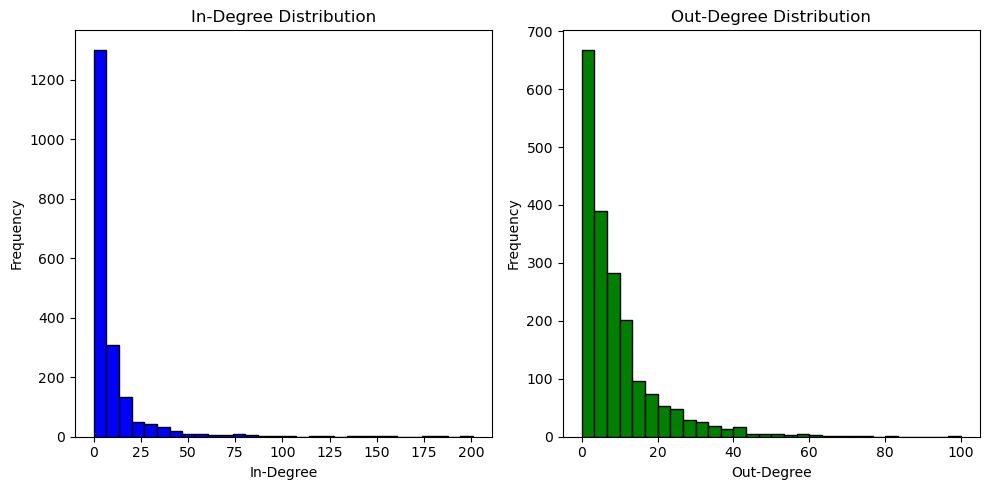

---

#### Additional Comparisons:

1. **Compare the Out-Degree Distribution to a Random Network**:
   - We compared the out-degree distribution of the original network to that of a random network with the same number of nodes and links. The original network displayed a more skewed distribution, with a few high out-degree nodes, indicating a more structured network with potential hubs. In contrast, the random network showed a more uniform out-degree distribution, reflecting a lack of hubs or strongly connected nodes.

2. **Compare the In-Degree Distribution to a Scale-Free Network**:
   - For the in-degree comparison, the original network exhibited some scale-free characteristics, with many low in-degree nodes and a few high in-degree nodes. However, the distribution was not as extreme as a pure scale-free network, where a small number of nodes would have a very high degree. This suggests the original network has a semi-scale-free structure, though with less concentration of hubs compared to a typical scale-free network.

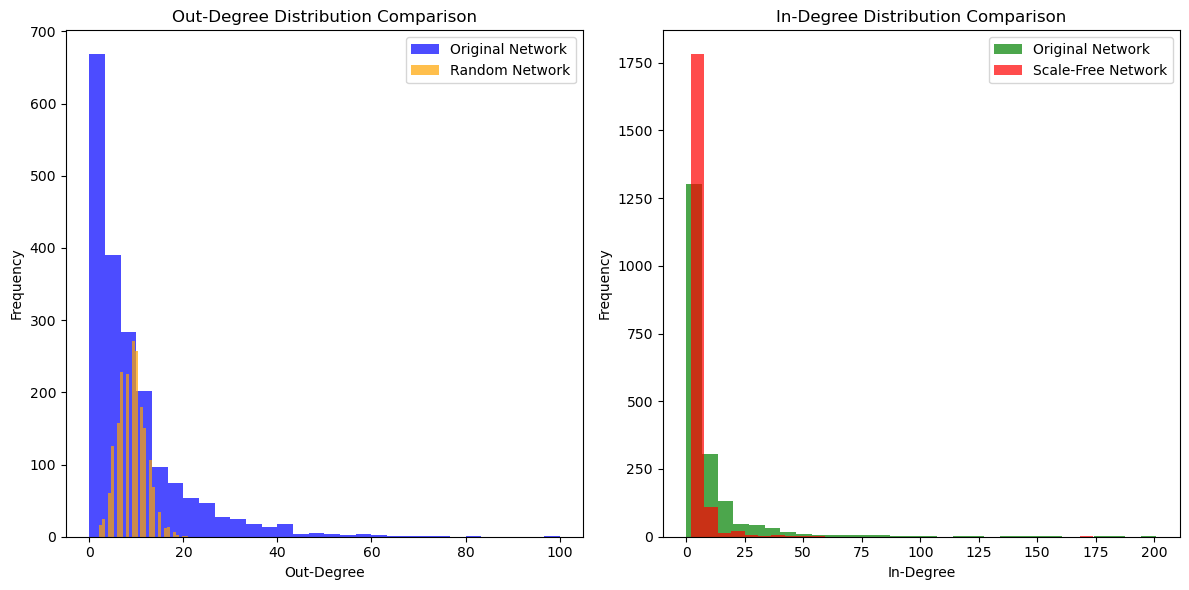

---

### Question 4: Who are the top 5 most connected performers?
*Report results for in-degrees and out-degrees (i.e., who has the highest in-degree, and who has the highest out-degree)? Comment on your findings. Is this what you would have expected?*

#### Top 5 Performers by In-Degree (Most Referenced):

1. **Willie Nelson**: 202 links
2. **Johnny Cash**: 184 links
3. **Elvis Presley**: 177 links
4. **Dolly Parton**: 162 links
5. **George Jones**: 156 links

#### Top 5 Performers by Out-Degree (Most Linking to Others):

1. **Hillary Lindsey**: 100 links
2. **Pam Tillis**: 82 links
3. **Randy Travis**: 75 links
4. **Vince Gill**: 71 links
5. **Dwight Yoakam**: 67 links

### Comment on Findings:
The top performers by in-degree are legendary artists, which aligns with expectations, as these icons are widely referenced and influential in the country music genre. On the other hand, the out-degree rankings highlight songwriters and contemporary artists such as Hillary Lindsey and Pam Tillis, who are highly connected by contributing or collaborating with others. This suggests that the most referenced performers are not necessarily the most actively linking, revealing a difference between established legends and those more actively contributing to new work.

---

### Question 5: What are the 10 pages with the longest wiki entries?
*Use the length of the content attribute to figure this out.*

#### Top 10 Performers with the Longest Wiki Entries:

1. **Beyoncé**: 62,859 words
2. **Taylor Swift**: 56,352 words
3. **Miley Cyrus**: 51,262 words
4. **Justin Bieber**: 50,694 words
5. **Carrie Underwood**: 45,245 words
6. **Justin Timberlake**: 44,775 words
7. **Demi Lovato**: 44,189 words
8. **Bob Dylan**: 41,087 words
9. **Ed Sheeran**: 36,322 words
10. **Elvis Presley**: 33,740 words

---


Part 3: Visualizing the networks

Question 1: For the sake of the visualisation, let's convert our network to undirected graph (tip: There is a NetworkX command to help you).

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty undirected graph
G_undirected_manual = nx.Graph()

# Add nodes from G_largest (the largest component of the original directed graph)
G_undirected_manual.add_nodes_from(G_largest.nodes())

# Add undirected edges by iterating over edges in G_largest
for u, v in G_largest.edges():
    if not G_undirected_manual.has_edge(u, v) and not G_undirected_manual.has_edge(v, u):
        G_undirected_manual.add_edge(u, v)

# Visualize the manually created undirected graph
plt.figure(figsize=(12, 12))  # Adjust the figure size if necessary
nx.draw(G_undirected_manual, with_labels=True, node_size=50, font_size=8)

# Show the plot
plt.show()

Part 3: Visualizing the networks

Question 2: Use the NetworkX command nx.draw_kamada_kawai to draw the resulting undirected network. (You can find background on the algorithm here.)

Set up your plot so that node-size depends on the node degree. Make the node color depend on the length of content attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create an empty undirected graph
G_undirected_manual = nx.Graph()

# Add nodes from G_largest along with their attributes
for node, data in G_largest.nodes(data=True):
    G_undirected_manual.add_node(node, **data)

# Add undirected edges by iterating over edges in G_largest
for u, v in G_largest.edges():
    if not G_undirected_manual.has_edge(u, v) and not G_undirected_manual.has_edge(v, u):
        G_undirected_manual.add_edge(u, v)

# Set up node sizes based on degree (scale up by multiplying by a constant, e.g., 10)
node_sizes = [G_undirected_manual.degree(n) * 10 for n in G_undirected_manual.nodes()]

# Set up node colors based on the 'content_length' attribute and normalize
# Use a default value if 'content_length' is missing
node_colors = [G_undirected_manual.nodes[n].get('content_length', 0) for n in G_undirected_manual.nodes()]
node_colors_normalized = (node_colors - np.min(node_colors)) / (np.max(node_colors) - np.min(node_colors))  # Normalize

# Plot the graph with Kamada-Kawai layout, customized node sizes and colors
plt.figure(figsize=(12, 12))
nx.draw_kamada_kawai(
    G_undirected_manual,
    with_labels=True,
    node_size=node_sizes,   
    node_color=node_colors_normalized,  
    cmap=plt.cm.Blues,         
    font_size=8
)

# Show the plot
plt.show()